In [1]:
from sklearn.cluster import KMeans
import pandas as pd

# Load the preprocessed data
data = pd.read_csv('C:\\Users\\Rithi\\Downloads\\preprocessedHeartAttack_data.csv')

# Select features for clustering
X = data[['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
          'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use',
          'Stress Level', 'Sedentary Hours Per Day', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
          'Sleep Hours Per Day', 'Systolic', 'Diastolic']]

# Specify the number of clusters
num_clusters = 2

# Initialize K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit K-Means model to the data
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
data['Cluster'] = cluster_labels

# Display the first few rows of the DataFrame with cluster labels
print(data.head())


   Age  Sex  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0   67    0    -0.369565   -0.083333         0               0        1   
1   21    0     0.942029    0.638889         1               1        1   
2   21    1     0.471014   -0.083333         1               0        0   
3   84    0     0.898551   -0.055556         1               1        1   
4   66    0     0.427536    0.500000         1               1        1   

   Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  Stress Level  \
0        0                    0                -0.586126  ...             9   
1        1                    1                -0.820020  ...             1   
2        0                    0                -0.793689  ...             9   
3        0                    1                -0.023979  ...             9   
4        1                    0                -0.423627  ...             6   

   Sedentary Hours Per Day       BMI  Triglycerides  \
0                 0

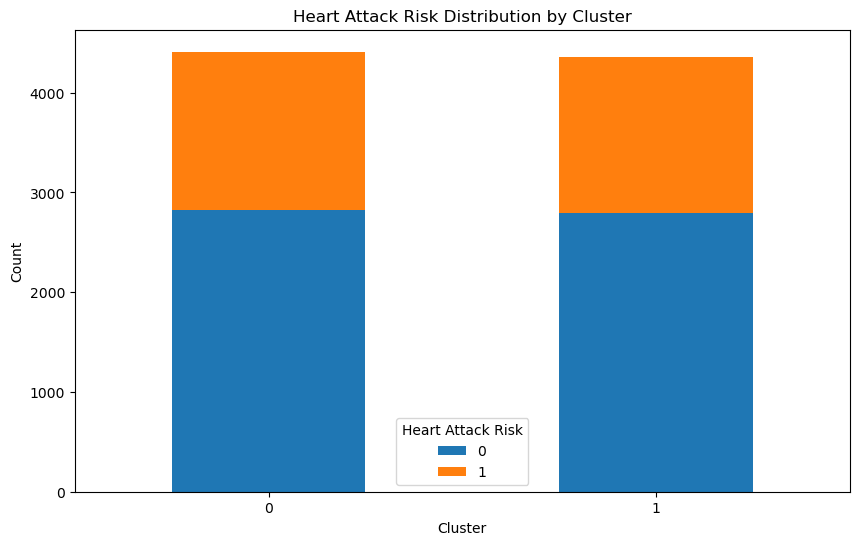

In [2]:
import matplotlib.pyplot as plt

# Group data by cluster and heart attack risk, and count occurrences
cluster_heart_attack_count = data.groupby(['Cluster', 'Heart Attack Risk']).size().unstack(fill_value=0)

# Plot a stacked bar chart
cluster_heart_attack_count.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Heart Attack Risk Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Heart Attack Risk')
plt.show()


In [3]:
from sklearn.metrics import accuracy_score


y_true = data['Heart Attack Risk']


y_pred = data['Cluster']


cluster_to_label = {
    0: y_true[data['Cluster'] == 0].mode()[0],
    1: y_true[data['Cluster'] == 1].mode()[0],
    
}

# Map predicted cluster labels to true labels using the mapping
y_pred_mapped = y_pred.map(cluster_to_label)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_mapped)

print("Accuracy of K-Means clustering:", accuracy)


Accuracy of K-Means clustering: 0.6417893415496976
